In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats
from sklearn.linear_model import LinearRegression

# <center> Analysis of Boston Housing Data

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


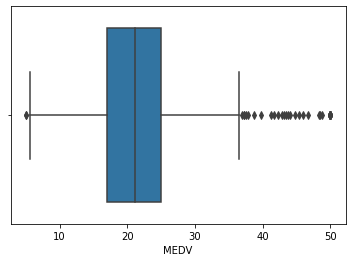

In [7]:
ax = sns.boxplot(x='MEDV', data=boston_df)

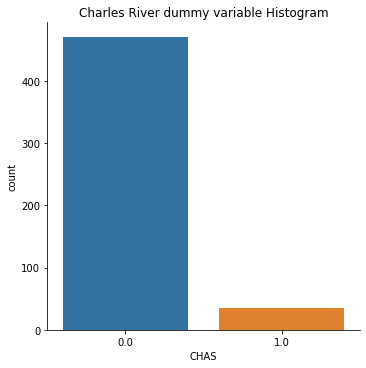

In [8]:
hist = sns.catplot(x='CHAS', kind='count', data=boston_df)
hist.set(title="Charles River dummy variable Histogram")

[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Proportion of owner-occupied units built prior to 1940'),
 Text(0.5, 1.0, 'MEDV vs AGE Boxplot')]

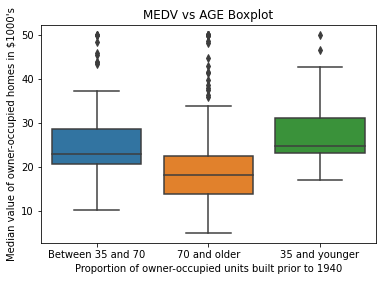

In [9]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

box = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
box.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "MEDV vs AGE Boxplot")

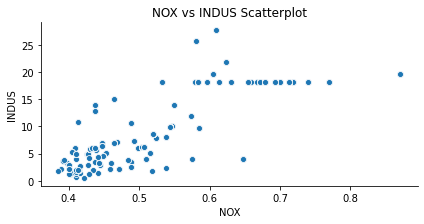

In [10]:
scatter = sns.relplot(x="NOX", y="INDUS",
            data=boston_df, height = 3, aspect = 2)
scatter.set(title="NOX vs INDUS Scatterplot")

There seems to be a strong postive correlation between the nitric oxides concentration (NOX) and the proportion of non-retail business acres per town (INDUS).

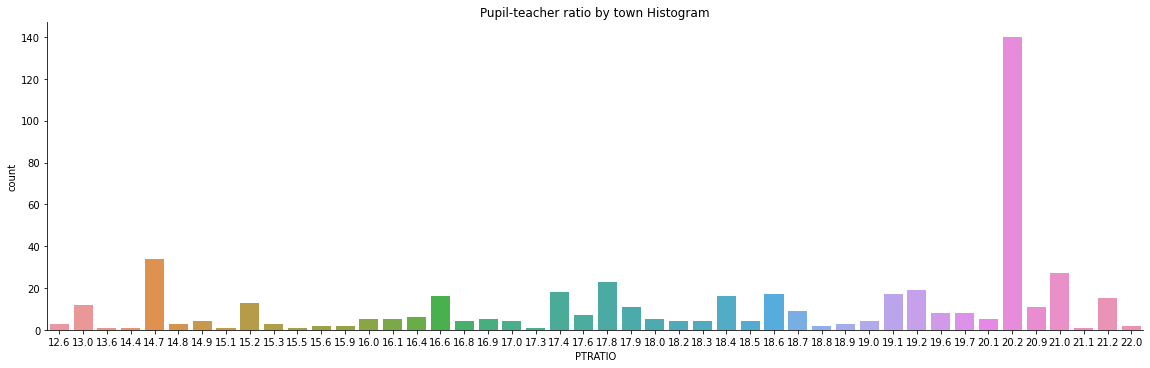

In [11]:
hist2 = sns.catplot(x='PTRATIO', kind='count', data=boston_df)
hist2.set(title="Pupil-teacher ratio by town Histogram")
hist2.fig.set_figwidth(18)

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

$𝐻_{0}$: µ1=µ2; "There is no difference in median value of houses bounded by the Charles river"

$𝐻_{1}$: µ1≠µ2; "There is a difference in median value of houses bounded by the Charles river"

In [12]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

Since the p-value is smaller than 0.05, we can reject the null hypothesis that there is no difference in median value of houses bounded by the Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

$𝐻_{0}$: µ1=µ2=µ3  (the three population means are equal)

$𝐻_{1}$: At least one of the means differ

In [13]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 years and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70 years"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 years and older"

In [17]:
scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 years and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70 years"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 years and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439634, pvalue=0.14675700390882251)

In [20]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 years and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70 years"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 years and older"]['MEDV']

In [21]:
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

$𝐻_{0}$:  There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

$𝐻_{1}$:  There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [22]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.7636514469209154, 7.913361061236894e-98)

Since the p-value is less than 0.05, we can reject the null hypothesis and conclude that there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

$H_{0}$: $β_{1}$ = 0 (There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

$H_{1}$: $β_{1}$ is not equal to 0 (There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes)

In [24]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 20 Jul 2021   Prob (F-statistic):           1.21e-08
Time:                        14:38:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evicence that there exists an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient 1.0916 means that impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres.